In [285]:
#import some stuff and datas
import pandas as pd
import math
import numpy as np
from sklearn import datasets, linear_model, cross_validation
import matplotlib.pyplot as plt
%matplotlib inline

#build that dataset from the houses thingy
data = pd.read_csv('/var/python/ga/dat-la-07/datasets/hw2-chicagohouseprices.csv')

#look at the data
print(data.describe())

data['is_sfr'] = data['HouseType'] == 'Single-Family Home'
data['log_price'] = np.log10(data['Price'])
data.fillna(data.mean(), inplace=True)
data['Bath'].fillna(data['Bath'].mean(), inplace=True)

                Price       Bath  CrimeIndex  MinutesToLoop  MilesToLake  \
count      219.000000  70.000000  219.000000     219.000000   219.000000   
mean    483431.050228   2.271429    4.663607       9.698630     3.420411   
std     400124.919077   0.883364    1.418146       2.898995     0.352522   
min      24500.000000   1.000000    1.090000       6.000000     2.770000   
25%     319000.000000   2.000000    3.940000       8.000000     3.150000   
50%     390000.000000   2.000000    4.930000       9.000000     3.400000   
75%     512500.000000   3.000000    5.580000      10.000000     3.685000   
max    3686000.000000   4.000000    8.080000      22.000000     4.200000   

              Age  LotSizeSqft  HouseSizeSqft  SchoolIndex  
count  219.000000   219.000000     219.000000   219.000000  
mean    29.424658   873.200913     699.977169    49.197717  
std     49.155880  1392.893683    1175.278922    18.554525  
min      0.000000     0.000000       0.000000    16.700000  
25%      0

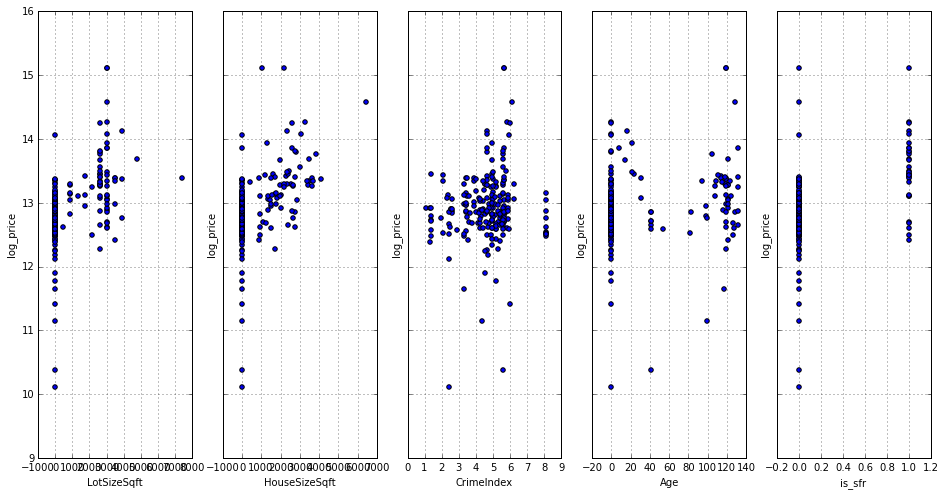

In [211]:
#do some scatter plotty type stuff
fig, axs = plt.subplots(1, 5, sharey=True)
data.plot(kind='scatter', x='LotSizeSqft', y='log_price', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='HouseSizeSqft', y='log_price', ax=axs[1])
data.plot(kind='scatter', x='CrimeIndex', y='log_price', ax=axs[2])
data.plot(kind='scatter', x='Age', y='log_price', ax=axs[3])
data.plot(kind='scatter', x='is_sfr', y='log_price', ax=axs[4])

In [284]:
x_train = data[['HouseSizeSqft', 'LotSizeSqft', 'is_sfr', 'Bath', 'MilesToLake', 'CrimeIndex', 'SchoolIndex', 'MinutesToLoop', 'Age']].values
y_train = data['log_price'].values


x_test = pd.DataFrame({'0': [3154], '1': [3049], '2': [1], '3': [2], '4': [3.96], '5': [3.76], '6': [16.7], '7': [10], '8': [116]}).values

lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

print('SCORE: ', lm.score(x_train, y_train))
pred = lm.predict(x_test)
print('PRICE: ', np.floor(10**pred[0]))

SCORE:  0.394790425553
PRICE:  855273.0


###Follow up
At first glance my score and price seem reasonable, per my human eyes

In [294]:
#lets do some cross validation
rs = cross_validation.ShuffleSplit(len(data), n_iter=10, test_size=10)
scores = cross_validation.cross_val_score(lm, x_train, y_train, cv=rs)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.29 (+/- 0.85)


####Post Validation
I'm not happy with the accuracy on my cross validation, but the homework is due to day so... ¯\_(ツ)_/¯